# Práctico 8: Transformada de Fourier

En este notebook resolveremos el octavo práctico enfocado en la aplicación de Transformadas de Fourier Discretas.

El enunciado solicita que:

> Encuentre la transformada de Fourier de:
> 
> $$ f(t)= \sin\left(\frac{t}{2\pi}\right) + \frac{1}{10} \sin(2\pi t) $$
> 
> 1. ¿Cuál la frecuencia de Nyquist en sus datos? ¿Puede muestrear correctamente la frecuencia máxima? ¿Por qué?
> 2. Presente gráficos de las frecuencias y muestre el fenómeno de vazamento.
> 3. Agregue los archivo de datos de tiempo y frecuencia.

Importamos librerías necesarias.
Dentro de Numpy podemos hallar un módulo para la aplicacion de las FFT.

In [1]:
import numpy as np
from numpy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt

Definimos la función que vamos a samplear.

In [2]:
def f(t):
    return np.sin(t / 2 / np.pi) + 1 / 10 * np.sin(2 * np.pi * t)

Sampleamos la función con un $\Delta t = 0.1s$ en un intervalo de $T = 200s$.

In [3]:
delta_t = 0.1
intervalo = 200
t = np.arange(0, intervalo, delta_t)
datos = f(t)

Graficamos los valores muestreados:

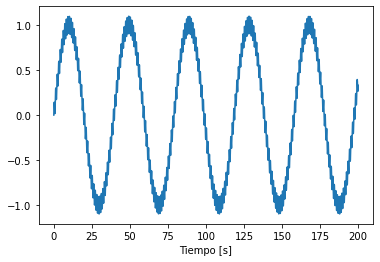

In [4]:
plt.plot(t, datos)
plt.xlabel("Tiempo [s]")
plt.show()

Aplicamos la Transformada de Fourier a los datos muestreados.

In [5]:
transformada = rfft(datos)  # transformada de Fourier de datos reales
freqs = rfftfreq(t.size, d=delta_t)  # eje de frecuencias

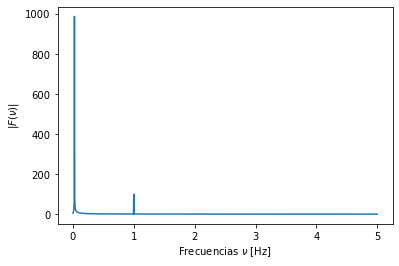

In [6]:
plt.plot(freqs, np.abs(transformada))
plt.xlabel(r"Frecuencias $\nu$ [Hz]")
plt.ylabel(r"$|F(\nu)|$")
plt.show()

## Frecuencia de Nyquist

La frecuencia de Nyquist se define como:

$$ \nu_N = \frac{1}{2 \Delta t} $$

Dado que nuestro $\Delta t = 0.1s$, entonces:

In [7]:
nyquist = 1 / 2 / delta_t

print("Frecuencia de Nyquist: {}Hz".format(nyquist))

Frecuencia de Nyquist: 5.0Hz


Hemos sido capaces de muestrear correctamente la frecuencia más alta (1Hz) dado que nuestra frecuencia de Nyquist es mayor que ella.

De haber tenido una frecuencia de Nyquist menor o igual, nuestro muestreo hubiese sufrido de aliasing y por ende el espectro no hubiese sido capaz de mostrar dicha componente de alta frecuencia.
Por ejemplo, si $\nu_N$ = 1Hz:

delta_t = 0.5s


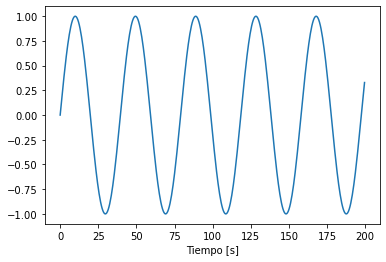

In [8]:
nyquist = 1

delta_t = 1 / 2 / nyquist
print("delta_t = {}s".format(delta_t))
t = np.arange(0, intervalo, delta_t)
datos = f(t)

plt.plot(t, datos)
plt.xlabel("Tiempo [s]")
plt.show()

Gráficamente podemos constatar que la alta frecuencia no está siendo correctamente muestreada.
Veamos qué sucede al aplicar la transformada de Fourier:

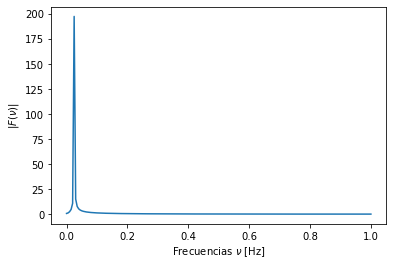

In [9]:
transformada = rfft(datos)  # transformada de Fourier de datos reales
freqs = rfftfreq(t.size, d=delta_t)  # eje de frecuencias

plt.plot(freqs, np.abs(transformada))
plt.xlabel(r"Frecuencias $\nu$ [Hz]")
plt.ylabel(r"$|F(\nu)|$")
plt.show()

Efectivamente, con una frecuencia de Nyquist menor o igual a la frecuencia que deseamos observar no es posible muestrear dicha componente frecuencial.

## Fenómeno de Vazamento

Veamos cómo al cambiar el intervalo de muestreo, la baja frecuencia presenta fenómeno de vazamento desplazando el máximo valor del espectro y modificando el ancho del pico.

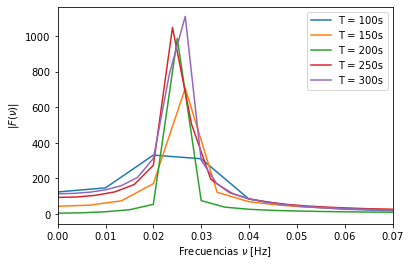

In [10]:
intervalos = [100, 150, 200, 250, 300]

for intervalo in intervalos:
    
    delta_t = 0.1
    t = np.arange(0, intervalo, delta_t)
    datos = f(t)

    transformada = rfft(datos)  # transformada de Fourier de datos reales
    freqs = rfftfreq(t.size, d=delta_t)  # eje de frecuencias

    plt.plot(freqs, np.abs(transformada), label="T = {}s".format(intervalo))

plt.xlim(0, 0.07)
plt.xlabel(r"Frecuencias $\nu$ [Hz]")
plt.ylabel(r"$|F(\nu)|$")
plt.legend()
plt.show()